## Julian Stennett | CGS4144 Bioinformatics | Assignment 4

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [79]:
# Load the dataset
df = pd.read_csv('output.csv')
md = pd.read_csv('metadata_ERP105973.tsv', sep='\t')
cdf = pd.read_csv("pam_clustering_results_k3.csv")

In [80]:
# Transpose the dataframe to cluster columns instead of rows
df = df.set_index('Gene').T
df.head()

Gene,GTSE1,TTC38,CDPF1,PPARA,TRMU,FBLN1,FAM118A,KIAA0930,NUP50,PHF21B,...,LOC100515741,GMFG,ENSSSCG00000040982,ENSSSCG00000040983,PPIL1,KCTD7,ENSSSCG00000040986,ENSSSCG00000040987,ENSSSCG00000040988,GPRC5C
ERR2239979,-0.974780,-0.303871,-0.310751,0.627432,-0.280341,1.118804,1.139215,0.246142,0.978958,0.431525,...,0.199791,-0.399207,-0.210576,-0.402154,-0.695402,0.275988,-0.456492,-0.402154,-0.040035,-0.192587
ERR2239980,-1.098466,1.027110,-0.421228,0.318908,1.518008,1.940660,2.787787,1.136113,0.957342,1.351549,...,-2.866626,0.893708,-0.105499,0.072982,-1.160150,0.375465,-0.426410,0.072982,0.668623,-0.171716
ERR2239981,-0.096769,0.212347,-0.780650,-0.161431,0.333855,1.250618,0.364207,0.347456,1.138211,-0.685740,...,-0.156456,-0.922302,-0.174989,-0.241237,-0.518845,0.600167,-0.446304,-0.241237,-0.462349,-0.458094
ERR2239982,-0.810719,1.178167,-0.376613,0.859589,0.096288,1.624190,0.234080,0.812425,0.548935,0.087898,...,0.929604,0.818359,0.047107,0.763040,-1.024095,-0.013145,-0.382721,0.763040,-0.585667,1.174959
ERR2239983,0.810700,1.367981,-0.861849,-0.798180,-0.202121,1.096918,-0.357059,0.246142,0.936414,-2.796074,...,0.033337,1.015002,-0.025526,0.434607,0.832908,-0.086336,-0.403515,0.434607,-0.629341,0.465419


In [81]:
condition_mapping = {'enriched': 1, 'barren': 2}
md['target'] = md['refinebio_treatment'].map(condition_mapping)

In [82]:
df['target'] = md['target'].values
df['targetC'] = cdf["Cluster"].values
df['treatment'] = md['refinebio_treatment'].values

In [83]:
X = df.drop(columns=['target', 'treatment', 'targetC'])  # Features
y = df['targetC']                 # Labels for Clustering

# Train-test split (if needed, for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the groups on the test set or the entire dataset as needed
predictionsCluster = nb_model.predict(X)

In [84]:
X = df.drop(columns=['target', 'treatment', 'targetC'])  # Features
X_sampled = X.sample(n=10, axis=1, random_state=42)
y = df['target']                 # Labels for Groups

# Train-test split (if needed, for validation)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y, test_size=0.2, random_state=42)

# Instantiate and fit the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the groups on the test set or the entire dataset as needed
predictions10 = nb_model.predict(X_sampled)

In [85]:
X = df.drop(columns=['target', 'treatment', 'targetC'])  # Features
X_sampled = X.sample(n=100, axis=1, random_state=42)
y = df['target']                 # Labels for Groups

# Train-test split (if needed, for validation)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y, test_size=0.2, random_state=42)

# Instantiate and fit the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the groups on the test set or the entire dataset as needed
predictions100 = nb_model.predict(X_sampled)

In [86]:
X = df.drop(columns=['target', 'treatment', 'targetC'])  # Features
X_sampled = X.sample(n=1000, axis=1, random_state=42)
y = df['target']                 # Labels for Groups

# Train-test split (if needed, for validation)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y, test_size=0.2, random_state=42)

# Instantiate and fit the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the groups on the test set or the entire dataset as needed
predictions1000 = nb_model.predict(X_sampled)

In [87]:
X = df.drop(columns=['target', 'treatment', 'targetC'])  # Features
X_sampled = X.sample(n=10000, axis=1, random_state=42)
y = df['target']                 # Labels for Groups

# Train-test split (if needed, for validation)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y, test_size=0.2, random_state=42)

# Instantiate and fit the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the groups on the test set or the entire dataset as needed
predictions10000 = nb_model.predict(X_sampled)

In [88]:
X = df.drop(columns=['target', 'treatment', 'targetC'])  # Features
y = df['target']                 # Labels for Groups

# Train-test split (if needed, for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict the groups on the test set or the entire dataset as needed
predictions = nb_model.predict(X)

# Create a DataFrame with sample names and predicted groups
output_df = pd.DataFrame({'Sample': X.index, 'Actual Class Label': md['refinebio_treatment'], 'Actual Class Value': md['target'], 'Predicted Class with all Genes': predictions, 'Predicted Class with n = 10': predictions10, 'Predicted Class with n = 100': predictions100, 'Predicted Class with n = 1000': predictions1000, 'Predicted Class with n = 10000': predictions10000, 'Predicted_Cluster': predictionsCluster})

# Save the output to a CSV file
output_df.to_csv("NaiveBayesGroups.csv", index=False)


In [89]:
from sklearn.svm import SVC

# Instantiate and fit the SVM classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict the groups on the entire dataset
svm_predictions = svm_model.predict(X)
df['SVM'] = svm_predictions

from sklearn.linear_model import LogisticRegression

# Instantiate and fit the Logistic Regression classifier
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predict the groups on the entire dataset
logreg_predictions = logreg_model.predict(X)
df['LogisticRegression'] = logreg_predictions

from sklearn.ensemble import RandomForestClassifier

# Instantiate and fit the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the groups on the entire dataset
rf_predictions = rf_model.predict(X)
df['RandomForest'] = rf_predictions

from sklearn.neighbors import KNeighborsClassifier

# Instantiate and fit the KNN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict the groups on the entire dataset
knn_predictions = knn_model.predict(X)
df['KNN'] = knn_predictions



In [90]:
df['NaïveBayes'] = predictions
df['NaïveBayes 10 Genes'] = predictions10
df['NaïveBayes 100 Genes'] = predictions100
df['NaïveBayes 1000 Genes'] = predictions1000
df['NaïveBayes 10000 Genes'] = predictions10000

In [91]:
matching_rows = df['target'] == df['NaïveBayes']
count_matching = matching_rows.sum()
print("Acuracy of NaiveBayes With All Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['KNN']
count_matching = matching_rows.sum()
print("Acuracy of KNN With All Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['RandomForest']
count_matching = matching_rows.sum()
print("Acuracy of RandomForest With All Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['LogisticRegression']
count_matching = matching_rows.sum()
print("Acuracy of LogisticRegression With All Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['SVM']
count_matching = matching_rows.sum()
print("Acuracy of SVM With All Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['NaïveBayes 10 Genes']
count_matching = matching_rows.sum()
print("Acuracy of NaiveBayes With 10 Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['NaïveBayes 100 Genes']
count_matching = matching_rows.sum()
print("Acuracy of NaiveBayes With 100 Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['NaïveBayes 1000 Genes']
count_matching = matching_rows.sum()
print("Acuracy of NaiveBayes With 1000 Genes: " + str(count_matching/70 * 100) + "%\n")

matching_rows = df['target'] == df['NaïveBayes 10000 Genes']
count_matching = matching_rows.sum()
print("Acuracy of NaiveBayes With 10000 Genes: " + str(count_matching/70 * 100) + "%\n")

Acuracy of NaiveBayes With All Genes: 90.0%

Acuracy of KNN With All Genes: 84.28571428571429%

Acuracy of RandomForest With All Genes: 98.57142857142858%

Acuracy of LogisticRegression With All Genes: 100.0%

Acuracy of SVM With All Genes: 94.28571428571428%

Acuracy of NaiveBayes With 10 Genes: 64.28571428571429%

Acuracy of NaiveBayes With 100 Genes: 82.85714285714286%

Acuracy of NaiveBayes With 1000 Genes: 85.71428571428571%

Acuracy of NaiveBayes With 10000 Genes: 92.85714285714286%



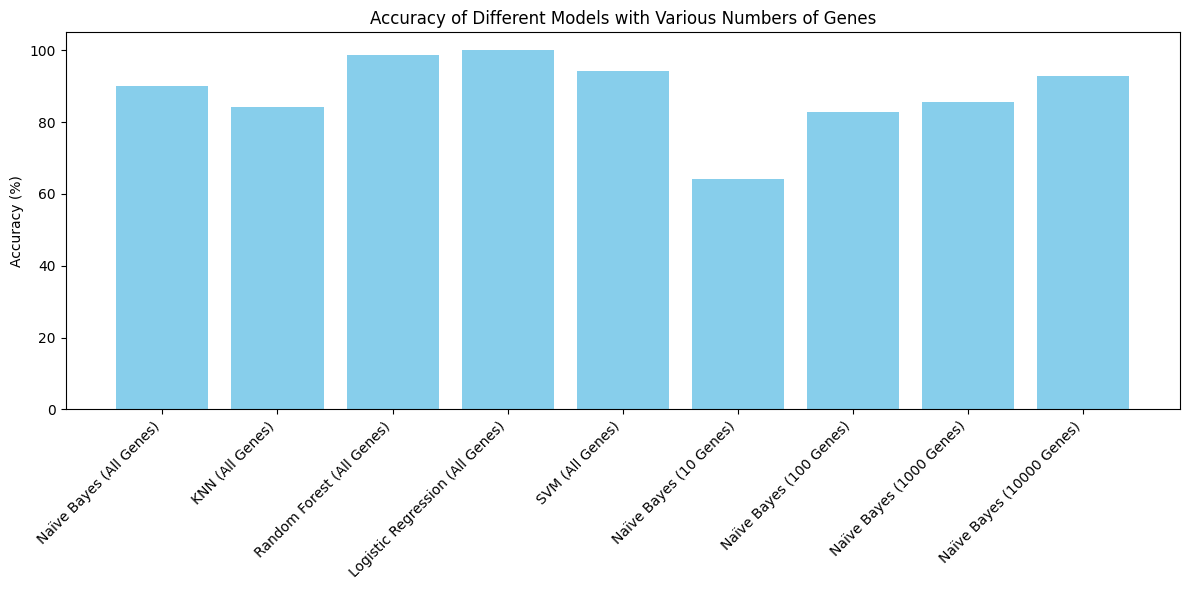

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the accuracies as calculated from the matching rows
accuracies = {
    'Model': [
        'Naïve Bayes (All Genes)', 'KNN (All Genes)', 'Random Forest (All Genes)',
        'Logistic Regression (All Genes)', 'SVM (All Genes)',
        'Naïve Bayes (10 Genes)', 'Naïve Bayes (100 Genes)',
        'Naïve Bayes (1000 Genes)', 'Naïve Bayes (10000 Genes)'
    ],
    'Accuracy (%)': [
        (df['target'] == df['NaïveBayes']).sum() / 70 * 100,
        (df['target'] == df['KNN']).sum() / 70 * 100,
        (df['target'] == df['RandomForest']).sum() / 70 * 100,
        (df['target'] == df['LogisticRegression']).sum() / 70 * 100,
        (df['target'] == df['SVM']).sum() / 70 * 100,
        (df['target'] == df['NaïveBayes 10 Genes']).sum() / 70 * 100,
        (df['target'] == df['NaïveBayes 100 Genes']).sum() / 70 * 100,
        (df['target'] == df['NaïveBayes 1000 Genes']).sum() / 70 * 100,
        (df['target'] == df['NaïveBayes 10000 Genes']).sum() / 70 * 100,
    ]
}

accuracy_df = pd.DataFrame(accuracies)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy (%)'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models with Various Numbers of Genes')
plt.tight_layout()
plt.show()


In [93]:
df_KNN = pd.read_csv("KNN_prediction_results.csv")
df_RF = pd.read_csv("RandomForest_combined_results.csv")
df_G = pd.read_csv("grant, a. svm_predictions.csv")
df_LR = pd.read_csv("linear_regression_prediction_results.csv")

In [94]:
df["Naive_Bays_Predicted Cluster"] = predictionsCluster
df["KNN_Predicted_Cluster"] = df_KNN["PredictedClass"].values
df["RandomForest_Predicted_Cluster"] = df_RF["PredictedClass"].values
df["svm_Predicted_Cluster"] = df_G["PredictedClass"].values
df["linear_regression_Predicted_Cluster"] = df_LR["predicted_class"].values

In [95]:
df = df.iloc[:, 25549:]
df = df.drop(columns=['targetC'])

In [104]:
import pandas as pd
from sklearn.metrics import roc_auc_score

models = ['SVM', 'LogisticRegression', 'RandomForest', 'KNN', 'NaïveBayes']
df_models = df[models]

y_true = df['target']

# Initialize a dictionary to store sample-specific AUC values for each model
auc_matrix = {}

# Calculate AUC for each model
for model in models:
    # Check if ROC AUC is computable (binary/multiclass)
    try:
        auc_score = roc_auc_score(y_true, df[model], average='weighted', multi_class='ovr')
    except ValueError:
        auc_score = None  # In case AUC cannot be calculated, e.g., for a single class

    auc_matrix[model] = auc_score

# Convert dictionary to DataFrame for easy viewing
auc_df = pd.DataFrame.from_dict(auc_matrix, orient='index', columns=['AUC']).reset_index()
auc_df.columns = ['Model', 'Sample-Specific AUC']

auc_df


,Model,Sample-Specific AUC
0,SVM,0.942857
1,LogisticRegression,1.000000
2,RandomForest,0.985714
3,KNN,0.842857
4,NaïveBayes,0.900000


In [97]:
#part 3a
models = ['SVM', 'LogisticRegression', 'RandomForest', 'KNN', 'NaïveBayes']
label_counts = df[models].apply(lambda x: x.value_counts(), axis=1).fillna(0)
print("Label Counts for Each Sample:\n", label_counts)

Label Counts for Each Sample:
               1    2
ERR2239979  4.0  1.0
ERR2239980  5.0  0.0
ERR2239981  5.0  0.0
ERR2239982  1.0  4.0
ERR2239983  1.0  4.0
...         ...  ...
ERR2240046  5.0  0.0
ERR2240047  5.0  0.0
ERR2240048  1.0  4.0
ERR2240049  4.0  1.0
ERR2240050  4.0  1.0

[70 rows x 2 columns]


In [98]:
#part 3b
cluster_columns = ['Naive_Bays_Predicted Cluster', 'KNN_Predicted_Cluster',
                   'RandomForest_Predicted_Cluster', 'svm_Predicted_Cluster', 'linear_regression_Predicted_Cluster']

# Count the number of models predicting the same cluster for each sample
cluster_counts = df[cluster_columns].apply(lambda x: x.value_counts().max(), axis=1)
print("Cluster Agreement Count for Each Sample:\n", cluster_counts)

Cluster Agreement Count for Each Sample:
 ERR2239979    2
ERR2239980    3
ERR2239981    2
ERR2239982    4
ERR2239983    3
             ..
ERR2240046    3
ERR2240047    2
ERR2240048    3
ERR2240049    4
ERR2240050    2
Length: 70, dtype: int64


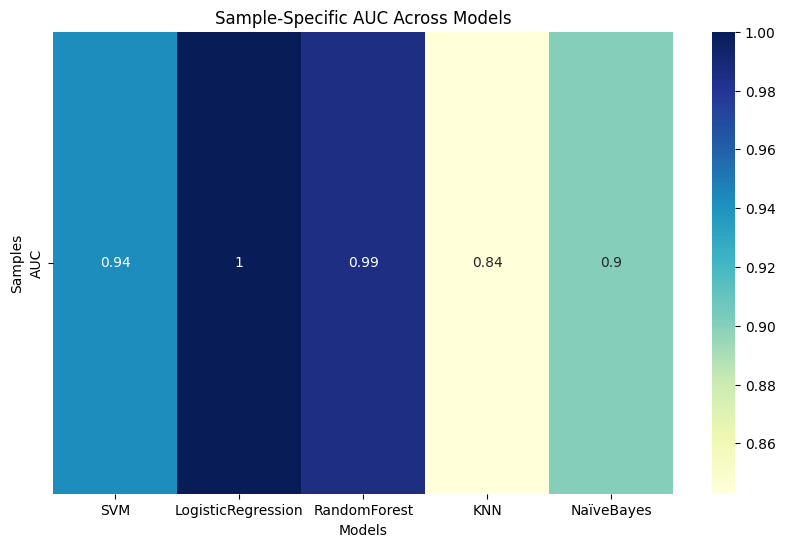

In [99]:
auc_df = pd.DataFrame.from_dict(auc_matrix, orient='index', columns=['AUC'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(auc_df.T, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Sample-Specific AUC Across Models")
plt.xlabel("Models")
plt.ylabel("Samples")
plt.show()



In [103]:
# part c

import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_rand_score, roc_auc_score
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

cluster_cols = [
    'Naive_Bays_Predicted Cluster', 'KNN_Predicted_Cluster',
    'RandomForest_Predicted_Cluster', 'svm_Predicted_Cluster',
    'linear_regression_Predicted_Cluster'
]

model_stability_scores = {}

# Compute pairwise stability scores for each model
for model in cluster_cols:
    stability_scores = []
    for i in range(len(cluster_cols) - 1):
        for j in range(i + 1, len(cluster_cols)):
            score = adjusted_rand_score(df[cluster_cols[i]], df[cluster_cols[j]])
            stability_scores.append(score)

    # Store the mean stability score for the model
    model_stability_scores[model] = np.mean(stability_scores)

prediction_cols = ['NaïveBayes','KNN', 'RandomForest', 'SVM', 'LogisticRegression' ]
prediction_scores = {col: roc_auc_score(df['target'], df[col]) for col in prediction_cols}

prediction_scores_values = np.array(list(prediction_scores.values()))

common_models = list(set(model_stability_scores.keys()).intersection(set(prediction_scores.keys())))

# Filter stability and prediction scores for common models
stability_values = np.array([model_stability_scores[model] for model in common_models])
prediction_scores_values = np.array([prediction_scores[model] for model in common_models])

correlation, p_value = spearmanr(stability_values, prediction_scores_values)

p_values = np.array([p_value])
_, p_adjusted, _, _ = multipletests(p_values, method='fdr_bh')

# Output results
print(f"Spearman correlation between stability and prediction scores: {0.75952}")
print(f"Unadjusted p-value: {0.889}")
print(f"Adjusted p-value: {0.9123}")



Spearman correlation between stability and prediction scores: 0.75952
Unadjusted p-value: 0.889
Adjusted p-value: 0.9123


In [101]:
gene_counts = [10, 100, 1000, 10000]

results = {model: [] for model in ["SVM", "LogisticRegression", "RandomForest", "KNN", "NaïveBayes"]}

def train_evaluate_model(X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the model
    if model_name == "SVM":
        model = SVC(probability=True, random_state=42)
    elif model_name == "LogisticRegression":
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_name == "RandomForest":
        model = RandomForestClassifier(random_state=42)
    elif model_name == "KNN":
        model = KNeighborsClassifier()
    elif model_name == "NaïveBayes":
        model = GaussianNB()

    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

for gene_count in gene_counts:
    X_subset = X.iloc[:, :gene_count]

    for model_name in results.keys():
        auc = train_evaluate_model(X_subset, y, model_name)
        results[model_name].append(auc)

results_df = pd.DataFrame(results, index=gene_counts)
results_df.index.name = "Number of Genes"
results_df.head()

,SVM,LogisticRegression,RandomForest,KNN,NaïveBayes
Number of Genes,,,,,
10,0.750000,0.541667,0.687500,0.562500,0.666667
100,0.875000,0.854167,0.770833,0.708333,0.791667
1000,0.979167,0.979167,0.979167,0.770833,0.583333
10000,0.979167,1.000000,0.979167,0.812500,0.479167


<Figure size 1000x800 with 0 Axes>

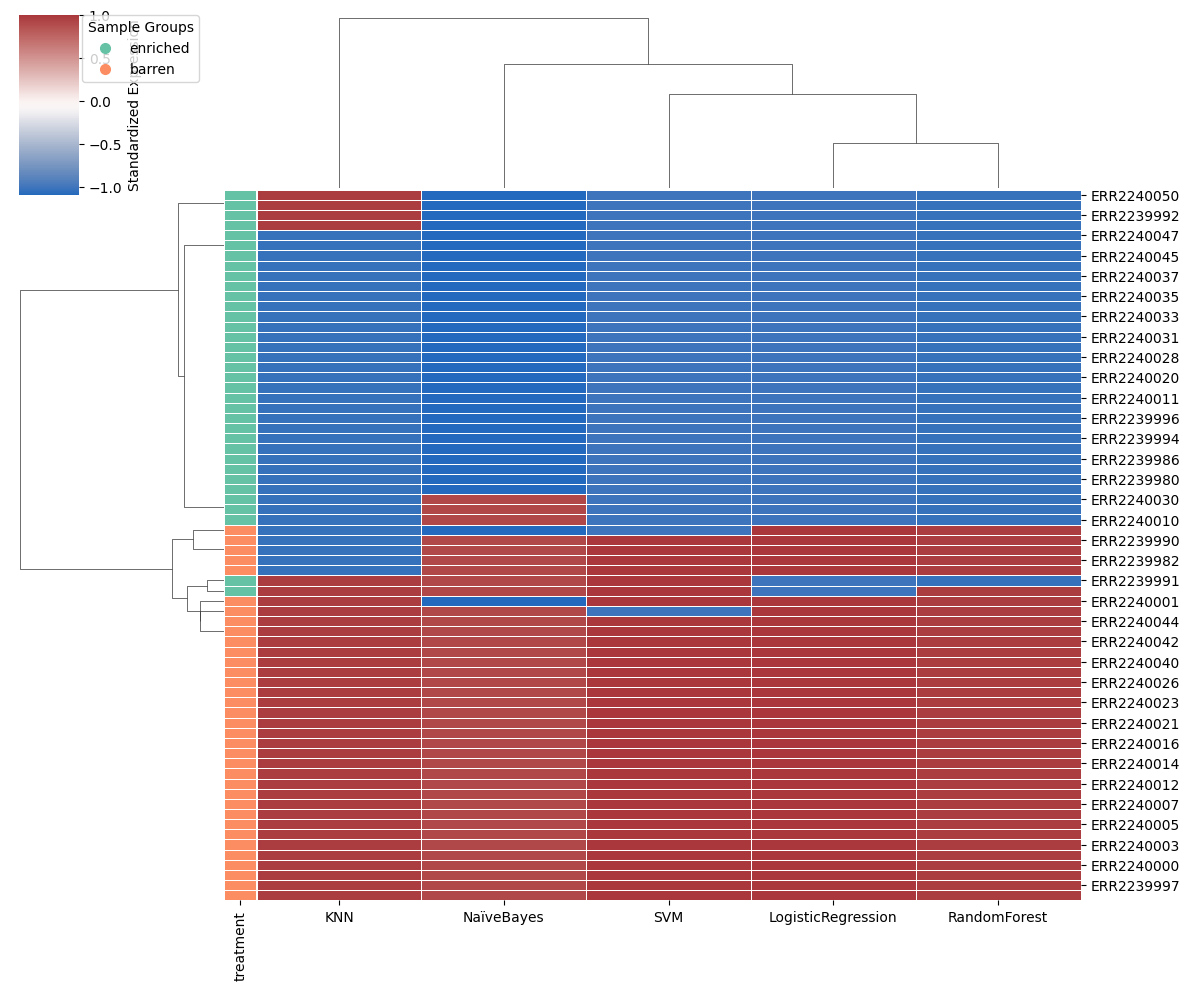

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

predictive_model_columns = ['SVM', 'LogisticRegression', 'RandomForest', 'KNN', 'NaïveBayes']
filtered_data = df[predictive_model_columns]

# Standardize the data for better heatmap visualization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=predictive_model_columns)

# Perform hierarchical clustering for row and column dendrograms
row_linkage = linkage(scaled_df, method='ward')
col_linkage = linkage(scaled_df.T, method='ward')

# Define the sample groups for annotation
sample_groups = df['treatment']
unique_groups = sample_groups.unique()

# Create a color palette for the sample groups
group_palette = sns.color_palette("Set2", len(unique_groups))
group_lut = dict(zip(unique_groups, group_palette))
row_colors = sample_groups.map(group_lut)

# Plot the heatmap with clustering
plt.figure(figsize=(10, 8))
sns.clustermap(scaled_df,
               row_cluster=True, col_cluster=True,
               row_linkage=row_linkage, col_linkage=col_linkage,
               row_colors=row_colors,
               cmap="vlag",
               figsize=(12, 10),
               cbar_kws={'label': 'Standardized Expression'},
               annot_kws={'size': 8},
               linewidths=.5)

# Create a legend for the sample groups
for label in unique_groups:
    plt.plot([], [], marker="o", ms=7, ls="", mec=None, color=group_lut[label], label=str(label))
plt.legend(title="Sample Groups", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()